In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


In [2]:
def zadeh_not(x):
    return (1 - x)

def zadeh_or(x, y):
    return np.maximum(x,y)

def zadeh_and(x, y, w):
    return np.minimum(x,y)


#all the yagers reqiure that w>0
def yager_not(x, w):
    return (1 - x**w)**(1/w)

def yager_or(x, y, w):
    return np.minimum(1, (x**w + y**w)**(1/w))

def yager_and(x, y, w):
    return 1 - np.minimum(1, ((1-x)**w + (1-y)**w)**(1/w))

In [42]:
sample_size = 1000

#temp domain 0-100F
domain_temp = np.linspace(0,100,sample_size)
temp_cold = fuzz.trapmf(domain_temp,[0,0,40,70])
temp_warm = fuzz.trapmf(domain_temp,[60,75,85,95])
temp_hot = fuzz.trapmf(domain_temp,[90,95,100,100])

#particle size 1 small - 10 mm very large
domain_part = np.linspace(0,10,sample_size)
part_small = fuzz.trapmf(domain_part,[0,0,0.25,0.5])
part_med = fuzz.trapmf(domain_part,[0,0.5,1.5,2])
part_large = fuzz.trapmf(domain_part,[1.5,3,10,10])

#organic_matter_perc 0-7%
domain_org = np.linspace(0,7,sample_size)
org_low = fuzz.trapmf(domain_org,[0,0,1.5,2])
org_ave = fuzz.trapmf(domain_org,[1.5,2,3,3.5])
org_high = fuzz.trapmf(domain_org,[3,3.5,7.0,7.0])

#depth 0 - 100 inches
domain_depth = np.linspace(0,100,sample_size)
depth_shallow = fuzz.trapmf(domain_depth,[0,0,15,25])
depth_mod = fuzz.trapmf(domain_depth,[15,20,35,45])
depth_deep = fuzz.trapmf(domain_depth,[40,50,100,100])

#Bulk density 0 - 5 g/cm^3
domain_bulk = np.linspace(0,5,sample_size)
bulk_low = fuzz.trapmf(domain_bulk,[0,1.2,1.3,1.5])
bulk_med = fuzz.trapmf(domain_bulk,[1.3,1.7,2.0,2.5])
bulk_high = fuzz.trapmf(domain_bulk,[2.0,3.0,5.0,5.0])


In [4]:
def addsubplot(ax,x_sample,var,var_name,title,xaxis):
    ax.plot(x_sample, var[0], 'g', linewidth=1.5, label=var_name[0])
    ax.plot(x_sample, var[1], 'y', linewidth=1.5, label=var_name[1])
    ax.plot(x_sample, var[2], 'r', linewidth=1.5, label=var_name[2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_ylabel("Membership")
    ax.set_xlabel(xaxis)
    ax.set_title(title)
    ax.legend()

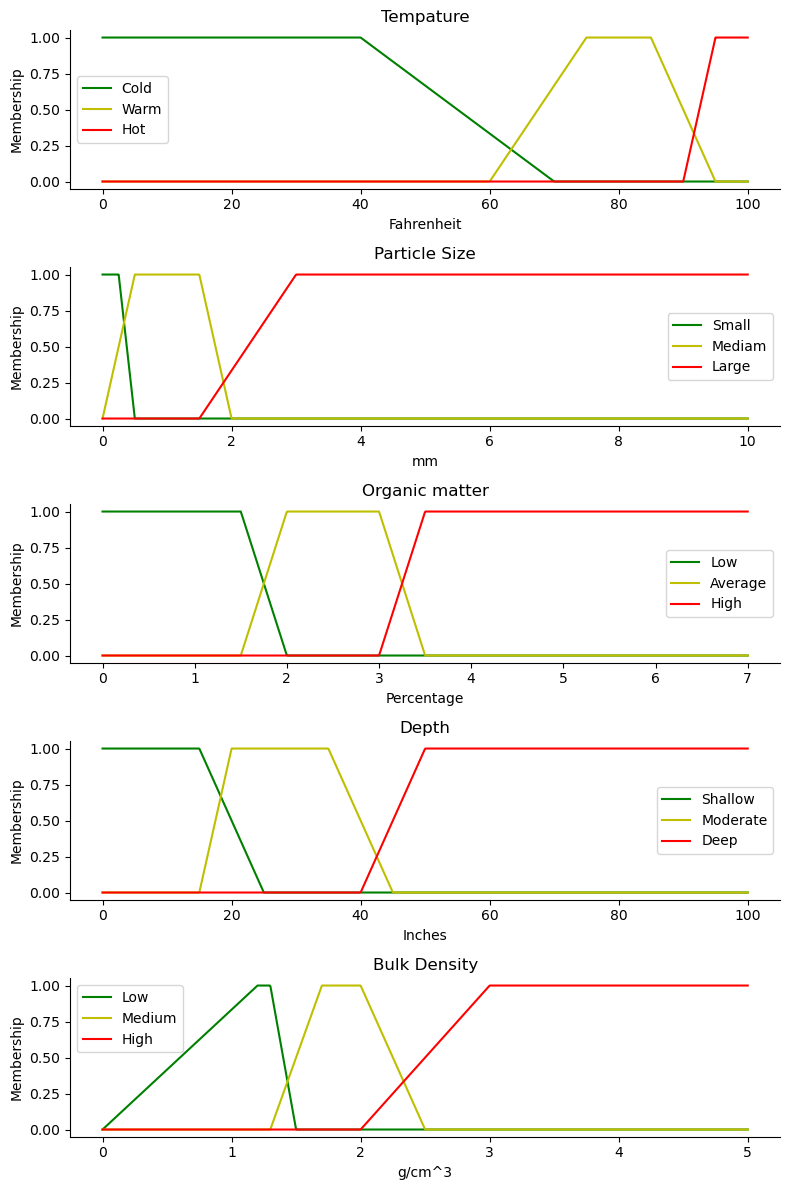

In [44]:
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=5, figsize=(8, 12))
var_mf = [temp_cold,temp_warm,temp_hot]
name_mf = ["Cold","Warm","Hot"]
addsubplot(ax0,domain_temp,var_mf,name_mf,"Tempature","Fahrenheit")

var_mf = [part_small,part_med,part_large]
name_mf = ["Small","Mediam","Large"]
addsubplot(ax1,domain_part,var_mf,name_mf,"Particle Size","mm")

var_mf = [org_low,org_ave,org_high]
name_mf = ["Low","Average","High"]
addsubplot(ax2,domain_org,var_mf,name_mf,"Organic matter","Percentage")

var_mf = [depth_shallow,depth_mod,depth_deep]
name_mf = ["Shallow","Moderate","Deep"]
addsubplot(ax3,domain_depth,var_mf,name_mf,"Depth","Inches")

var_mf = [bulk_low, bulk_med, bulk_high]
name_mf = ["Low","Medium","High"]
addsubplot(ax4,domain_bulk,var_mf,name_mf,"Bulk Density","g/cm^3")



plt.tight_layout()

In [27]:
 # Evaluate testing observation

test_sample = 94

# Invoke fuzzification

test_hot = fuzz.interp_membership(domain_temp, temp_hot, test_sample)
test_cool = fuzz.interp_membership(domain_temp, temp_warm, test_sample)
test_cold = fuzz.interp_membership(domain_temp, temp_cold, test_sample)

print("Test Sample: Temp = %s" % (test_sample))
print("Memberships: Hot = %s, warm = %s, Cold = %s"  % (test_hot, test_cool, test_cold))

Test Sample: Temp = 94
Memberships: Hot = 0.8, warm = 0.1, Cold = 0.0


In [49]:
def eval_soil()
    value_temp = fuzz.interp_membership(domain_temp,temp_warm,test_temp)
    value_part = fuzz.interp_membership(domain_part,part_med,test_part)
    
    print(value_temp,value_part)
    
    score = yager_and(value_part, value_temp, 10)

    print(score)

0.9987237237237241 0.9974474474474476
0.9974471982842134
